In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('customer_retention_dataset.xlsx')

In [4]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


### Pre-processing the columns names

In [4]:
from string import digits

#Removing tab spaces
df.columns = df.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [5]:
df.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [6]:
df.shape

(269, 71)

In [7]:
df.nunique()

Gender of respondent                                                     2
How old are you?                                                         5
Which city do you shop online from?                                     11
What is the Pin Code of where you shop online from?                     39
Since How Long You are Shopping Online ?                                 5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

In [8]:
df.dtypes

Gender of respondent                                                    object
How old are you?                                                        object
Which city do you shop online from?                                     object
What is the Pin Code of where you shop online from?                      int64
Since How Long You are Shopping Online ?                                object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [9]:
df.isnull().sum()

Gender of respondent                                                    0
How old are you?                                                        0
Which city do you shop online from?                                     0
What is the Pin Code of where you shop online from?                     0
Since How Long You are Shopping Online ?                                0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

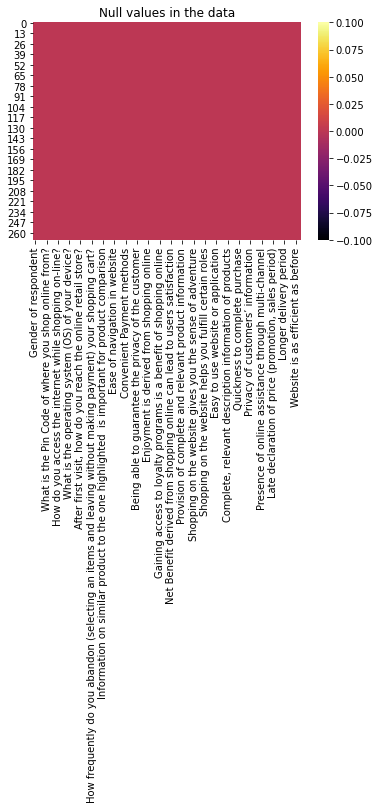

In [10]:
plt.title("Null values in the data", fontsize = 12)
sns.heatmap(df.isnull(), cmap = 'inferno')
plt.show()

### Univariate Analysis

In [11]:
personal_info=['Gender of respondent','How old are you?','Which city do you shop online from?',
               'What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?',
                   'How many times you have made an online purchase in the past  year?']

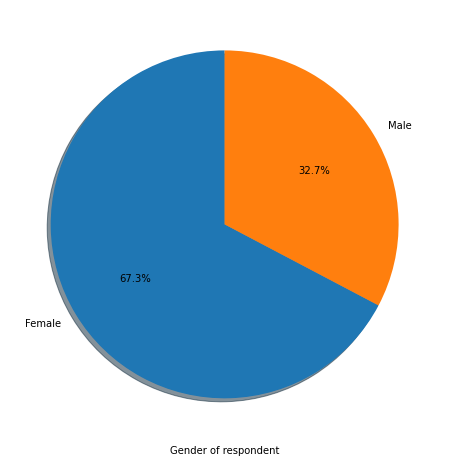

<Figure size 432x288 with 0 Axes>

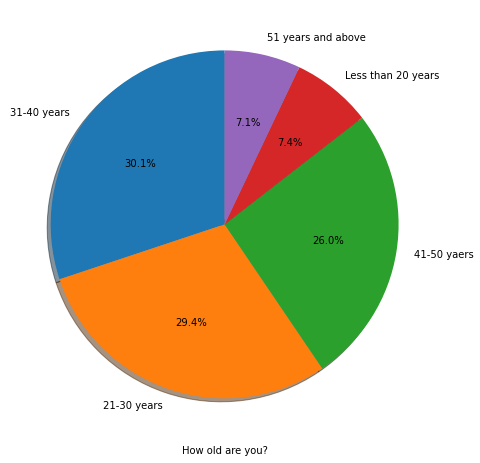

<Figure size 432x288 with 0 Axes>

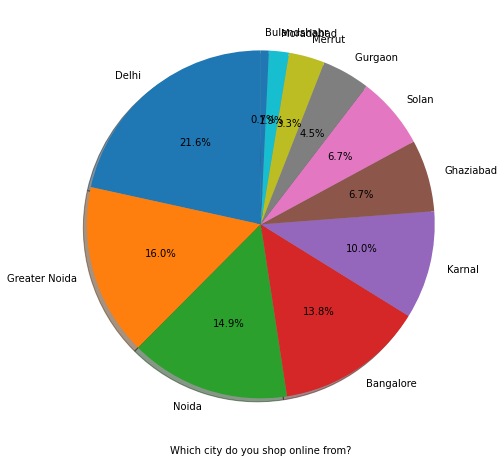

<Figure size 432x288 with 0 Axes>

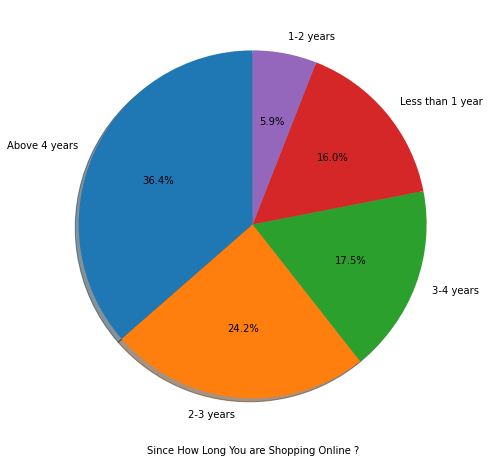

<Figure size 432x288 with 0 Axes>

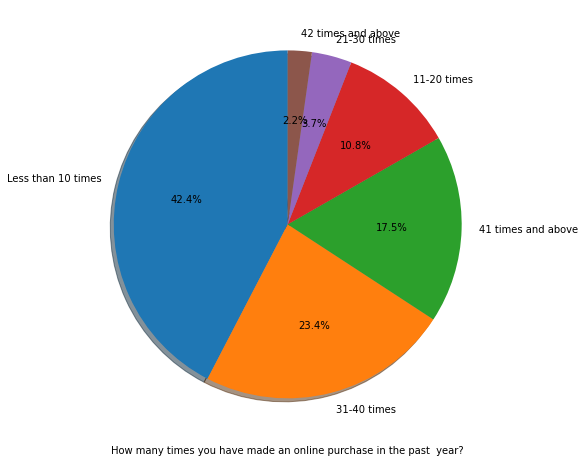

<Figure size 432x288 with 0 Axes>

In [12]:
for i in personal_info:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(8,8))
        df[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90)
        fig=plt.gcf()
        fig.gca()
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

### Analysis on the basis of Various following factors

#### Intention of Repeat purchase:

In [13]:
#Resolving ambiguity of column 
#Changing 42 times and above to 41 times and above
df['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above',
                                                                                inplace=True)

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

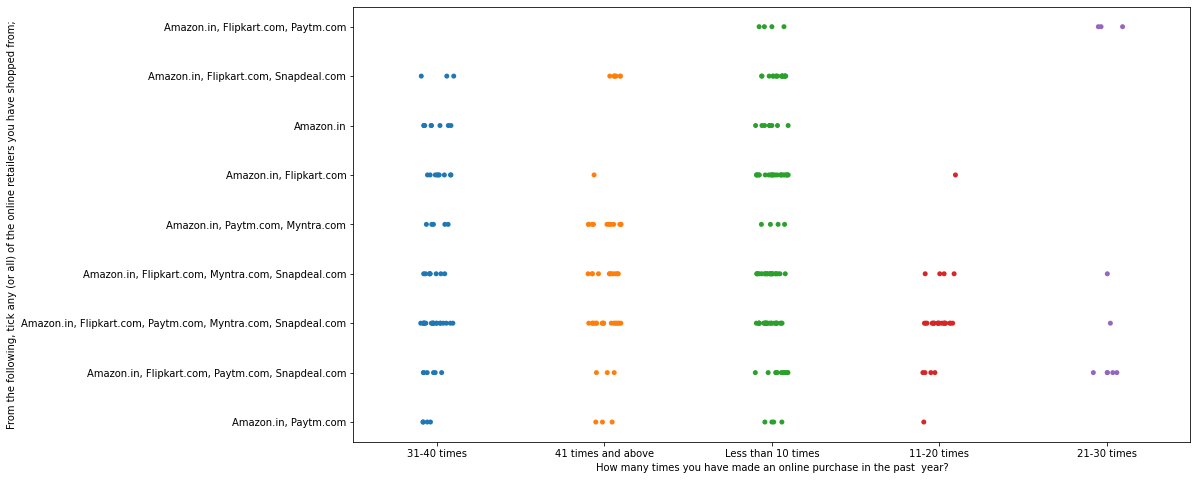

In [15]:
plt.figure(figsize=(15,8))
sns.stripplot(df['How many times you have made an online purchase in the past  year?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

Heavy shoppers who shop more than 41 times a year shop from all the online brands, some of the people who shop for 32-40 and less than 10 times a year seem to exclude myntra. People shop from Amazon and flipkart whatever be the case.

### Converting years to numbers 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

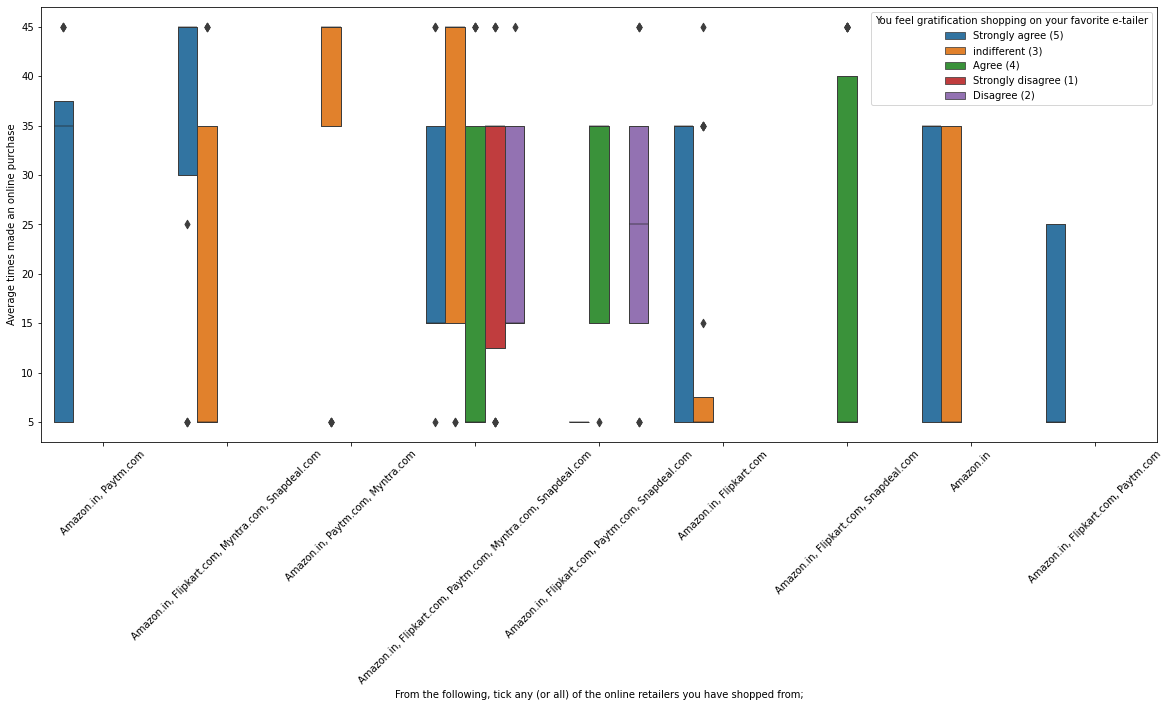

In [16]:
dict={'31-40 times':35,'41 times and above':45,'Less than 10 times':5,'11-20 times':15,'21-30 times':25}
df['Average times made an online purchase']=df['How many times you have made an online purchase in the past  year?'].replace(dict)
plt.figure(figsize=(20,8))
sns.boxenplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['You feel gratification shopping on your favorite e-tailer'])
plt.xticks(rotation=45)

Almost all the people who have shopped from amazon, flipkart and paytm are satisfied. People who shop from a more number of online brands dosent seem to be satisfied.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

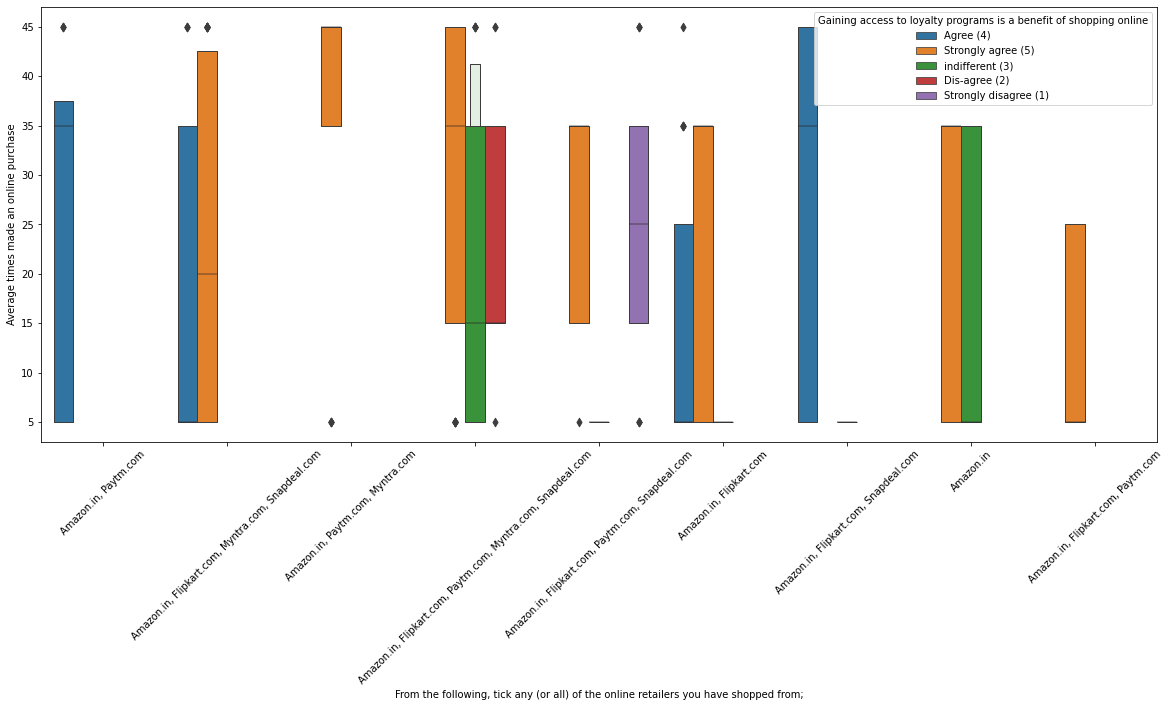

In [17]:
plt.figure(figsize=(20,8))
sns.boxenplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['Gaining access to loyalty programs is a benefit of shopping online'])
plt.xticks(rotation=45)

People shopping from amazon and paytm are getting benefits from the loyalty points, flipkart and sanpdeal also seem to give such benefits but people who shop from almost everywhere disagree with this statement too

### Online Retailing:

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

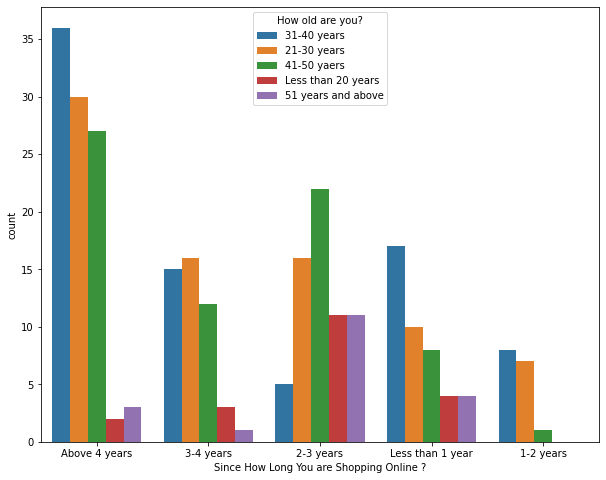

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['How old are you?'])

Highest number of people have been shopping online for above 4 years except for the age group below 20 years and above 50 years. People who are shopping online for 1-2 years does not include teenagers and elder people.

#### Converting Years to numbers for better analysis

In [19]:
df['Since How Long You are Shopping Online ?'].unique()

array(['Above 4 years', '3-4 years', '2-3 years', 'Less than 1 year',
       '1-2 years'], dtype=object)

In [20]:
dict={'Above 4 years':4.5,'3-4 years':3.5,'2-3 years':2.5,'1-2 years':1.5,'Less than 1 year':0.5}
df['Average years of shopping online']=df['Since How Long You are Shopping Online ?'].replace(dict)

In [21]:
df['Which city do you shop online from?'].unique()

array(['Delhi', 'Greater Noida', 'Karnal ', 'Bangalore ', 'Noida',
       'Solan', 'Moradabad', 'Gurgaon ', 'Merrut', 'Ghaziabad',
       'Bulandshahr'], dtype=object)

In [22]:
#Changing Greater noida to noida
df['Which city do you shop online from?'].replace({'Greater Noida':'Noida'},inplace=True)

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='Average years of shopping online'>

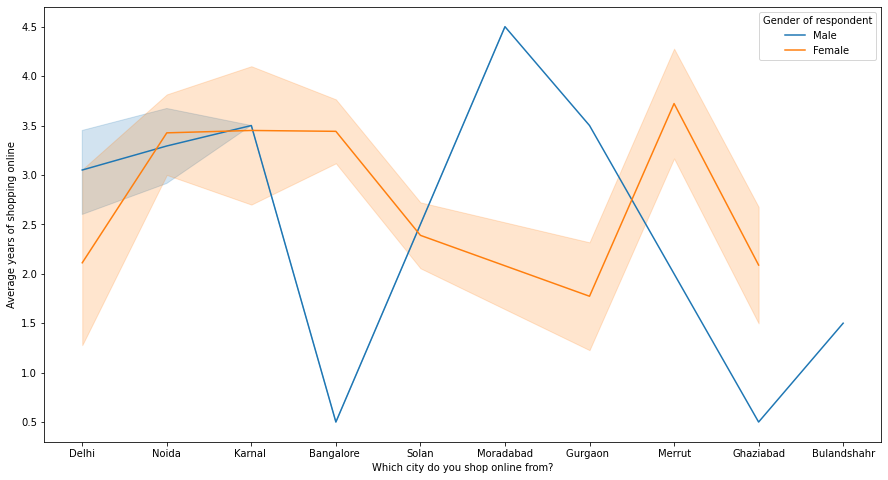

In [23]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Which city do you shop online from?'],df['Average years of shopping online'],hue=df['Gender of respondent'])

In lines, we can see that density of female customers is more than male. Men living in banglore and ghaziabad shop have shopped online for less than 1 year. Highest number of men shopping online belong from delhi and noida, while men from moradabad have been shopping online for the longest. Women from meerut and noida have shopped the longest.

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

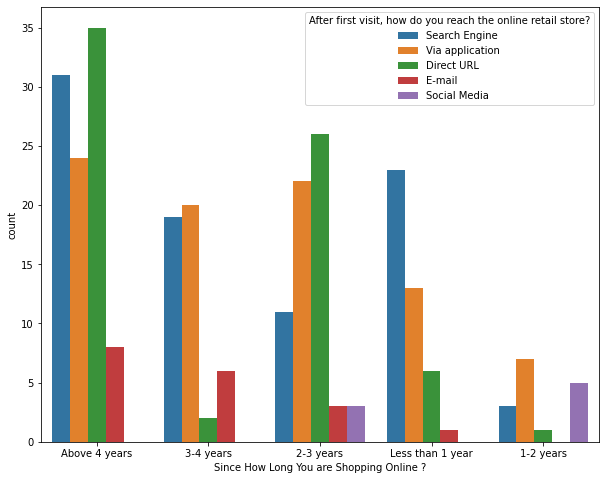

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['After first visit, how do you reach the online retail store?'])

Even though people who are shopping online for more than 3 years donot use the application rather use search engine and direct url's in large number which indicates that online brands should update all their platforms rather than just application.

### Brand image

In [25]:
performance=['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']

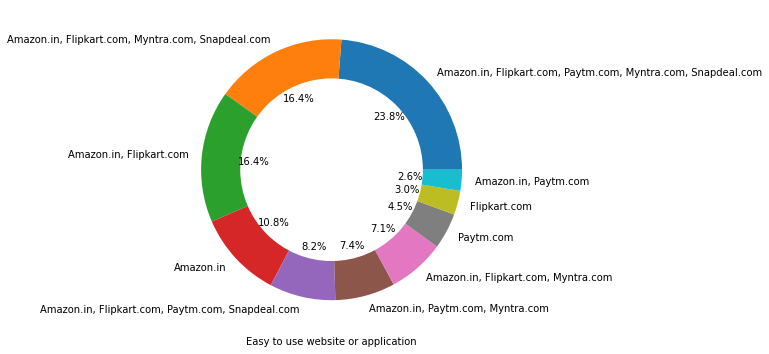

<Figure size 432x288 with 0 Axes>

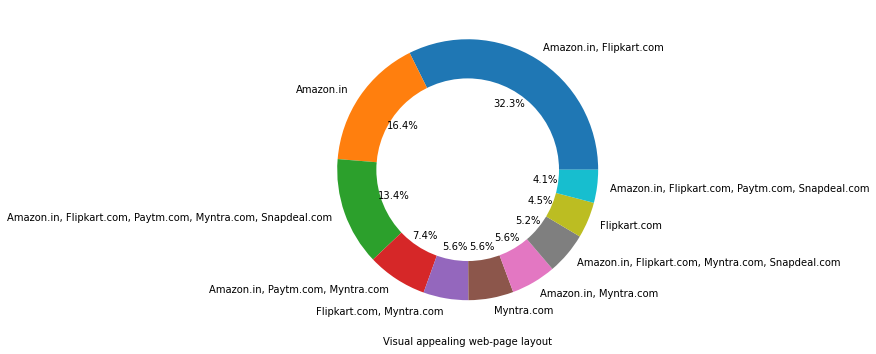

<Figure size 432x288 with 0 Axes>

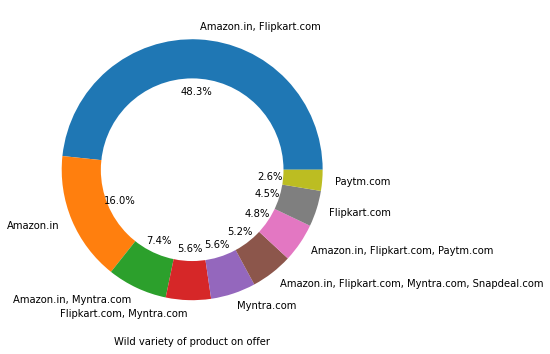

<Figure size 432x288 with 0 Axes>

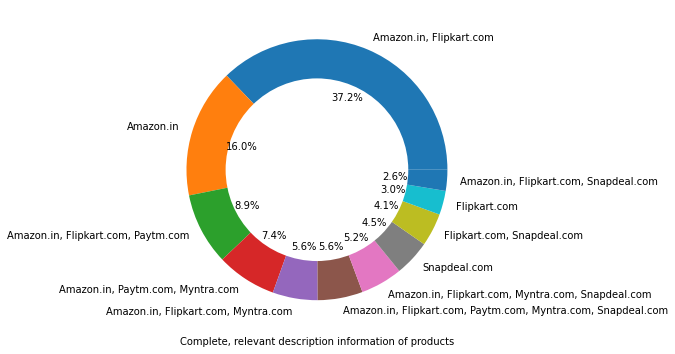

<Figure size 432x288 with 0 Axes>

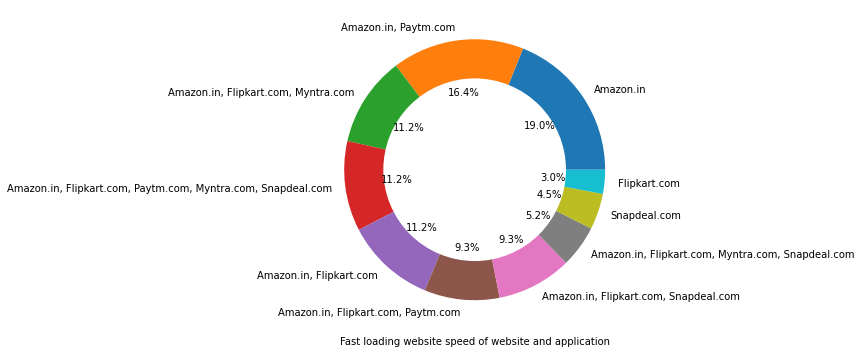

<Figure size 432x288 with 0 Axes>

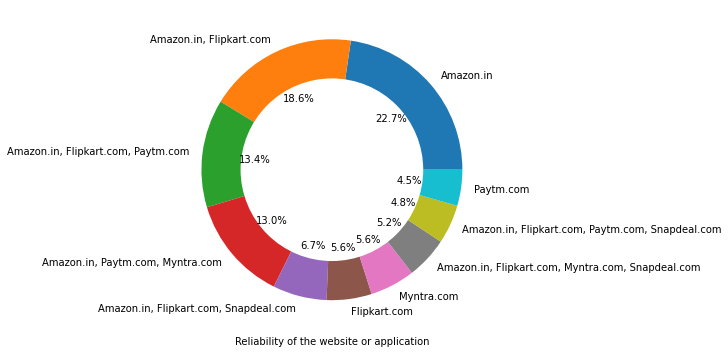

<Figure size 432x288 with 0 Axes>

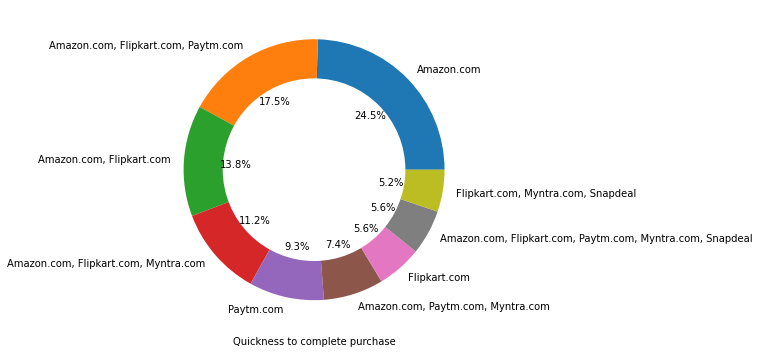

<Figure size 432x288 with 0 Axes>

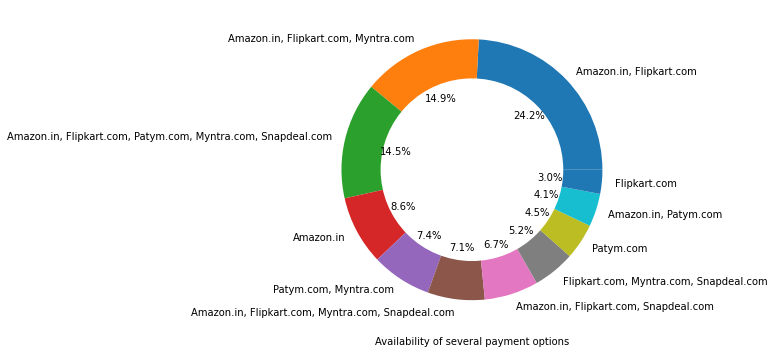

<Figure size 432x288 with 0 Axes>

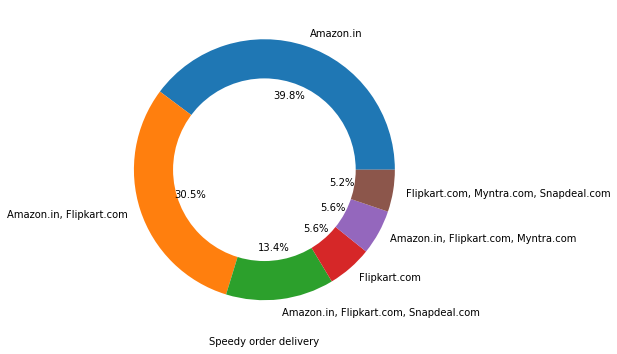

<Figure size 432x288 with 0 Axes>

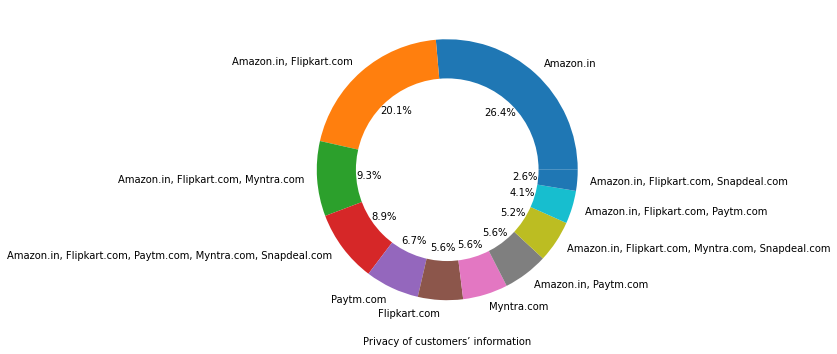

<Figure size 432x288 with 0 Axes>

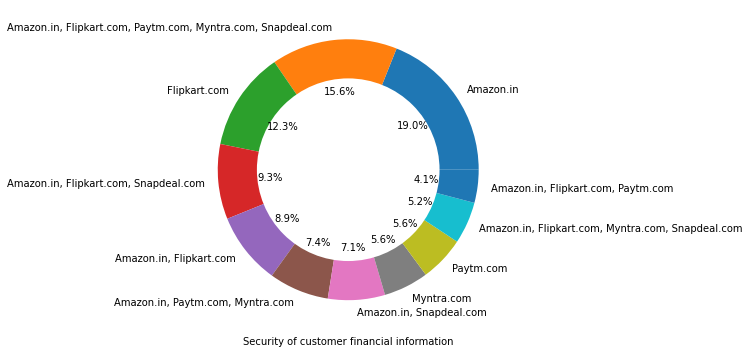

<Figure size 432x288 with 0 Axes>

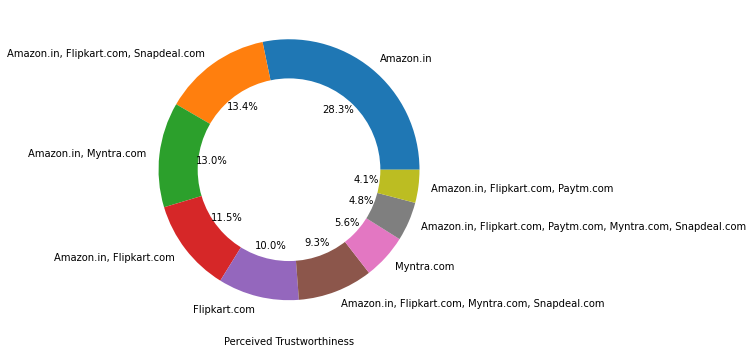

<Figure size 432x288 with 0 Axes>

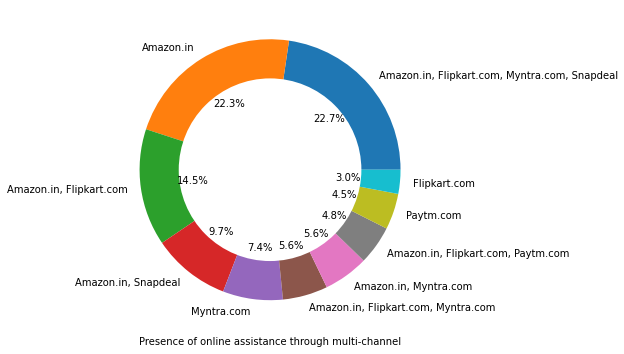

<Figure size 432x288 with 0 Axes>

In [26]:
for i in performance:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

Amazon, Flipkart have been had the highest votes for having all the positive points and have maintained a very good brand image followed by paytm and the myntra.

<AxesSubplot:xlabel='Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

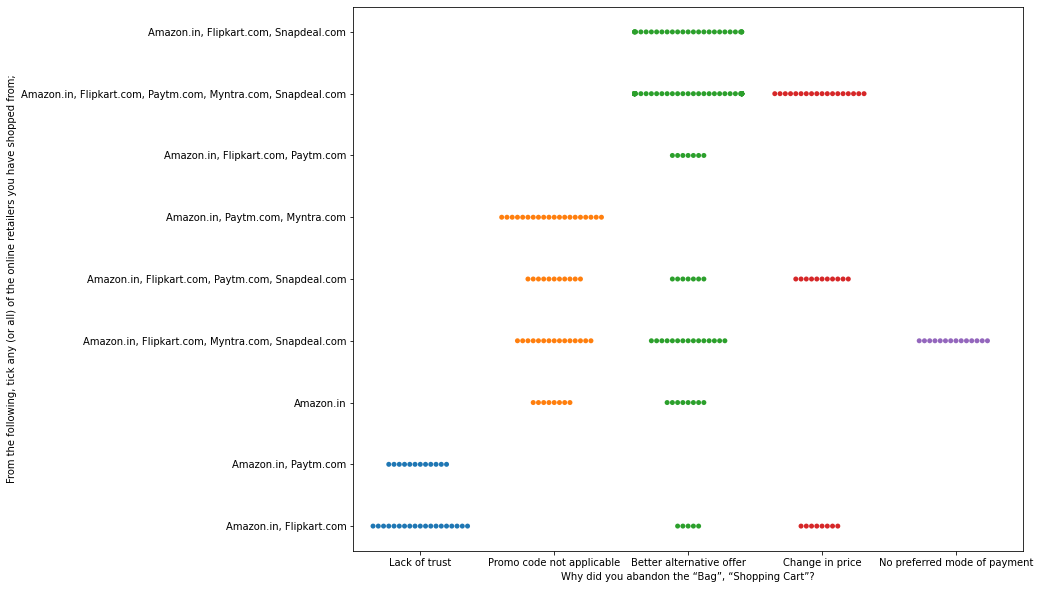

In [27]:
plt.figure(figsize=(12,10))
sns.swarmplot(df['Why did you abandon the “Bag”, “Shopping Cart”?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])


We can clearly see that most of the time people abandon the bag is beacuse they get a better alternative offer or promo code not applicable. There is also lack of trust seen in amazon, flipkart and paytm by some people.

In [28]:
#Collecting all the negative remarks about a brand
bad=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']

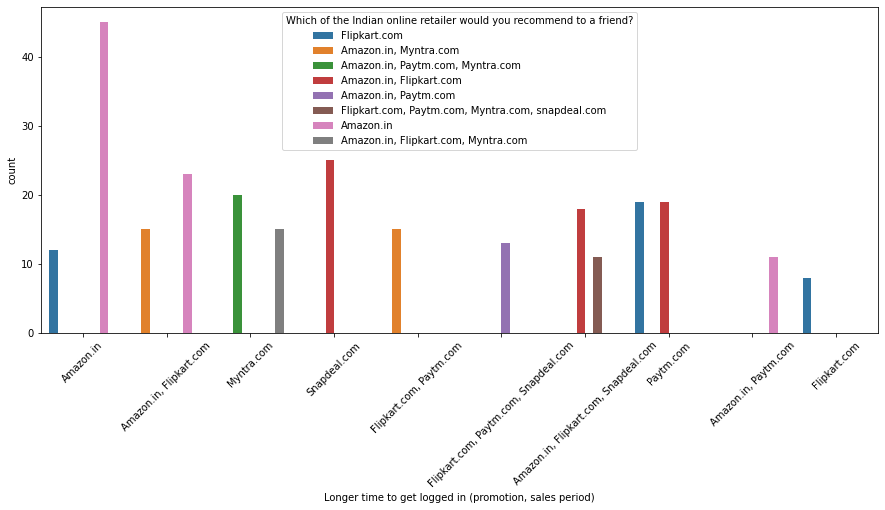

<Figure size 432x288 with 0 Axes>

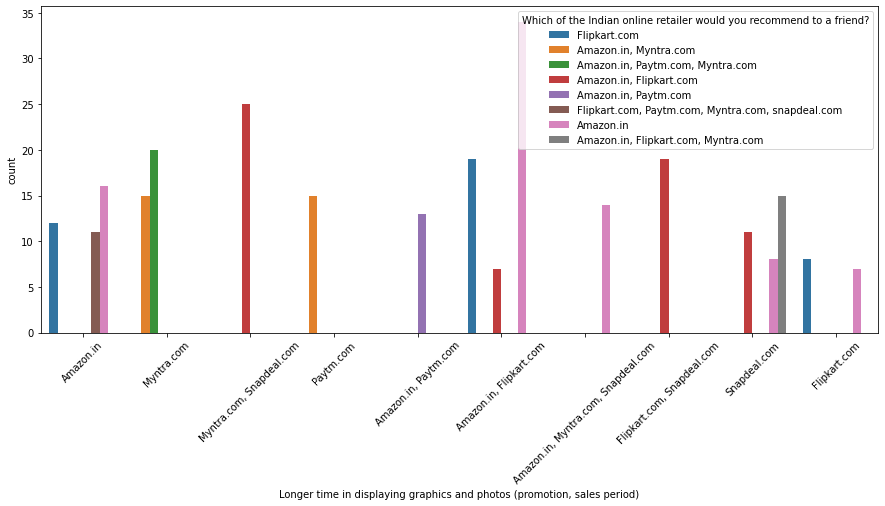

<Figure size 432x288 with 0 Axes>

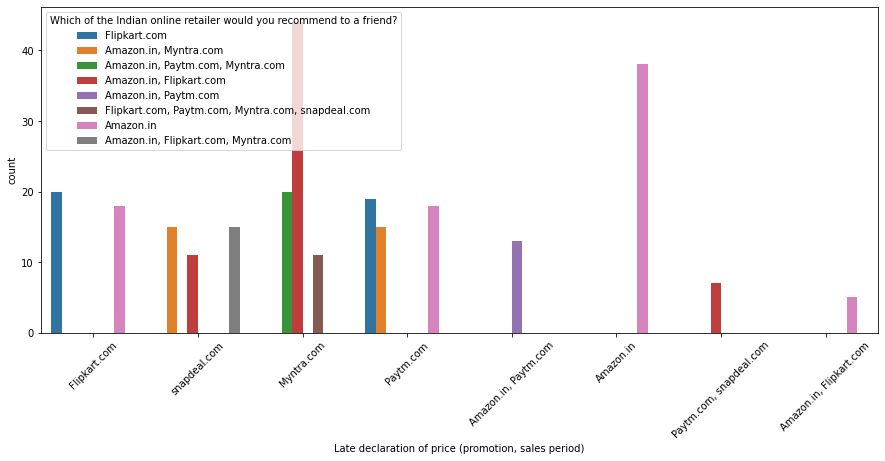

<Figure size 432x288 with 0 Axes>

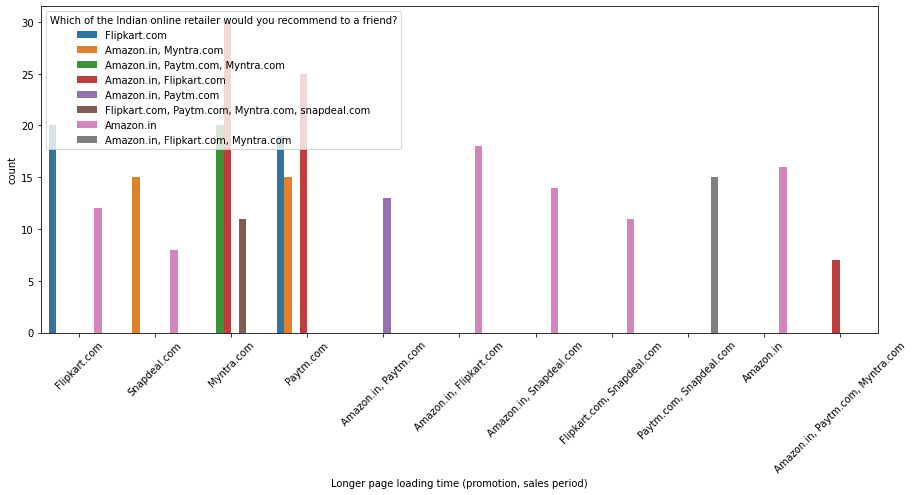

<Figure size 432x288 with 0 Axes>

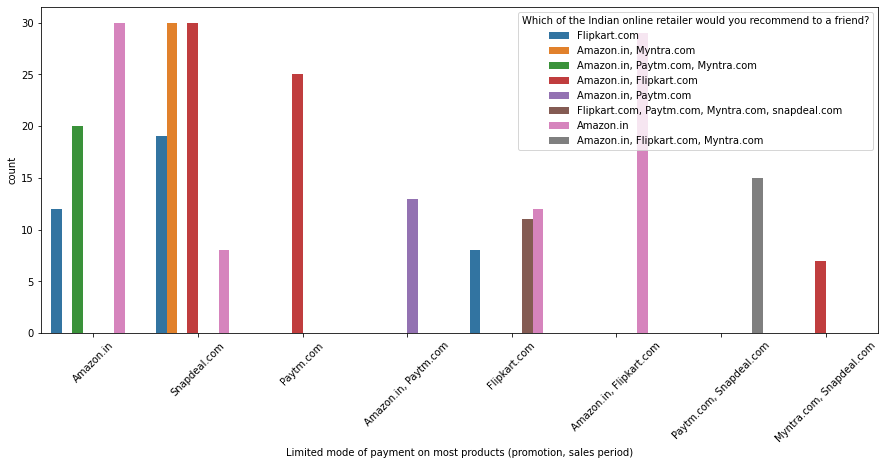

<Figure size 432x288 with 0 Axes>

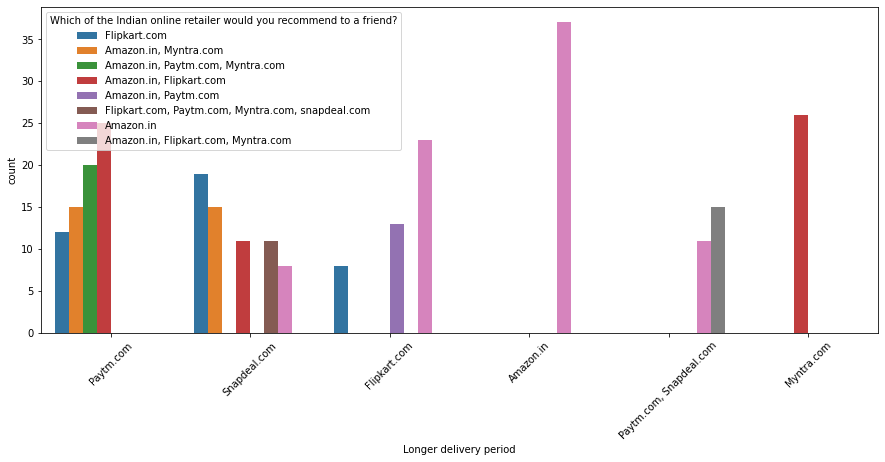

<Figure size 432x288 with 0 Axes>

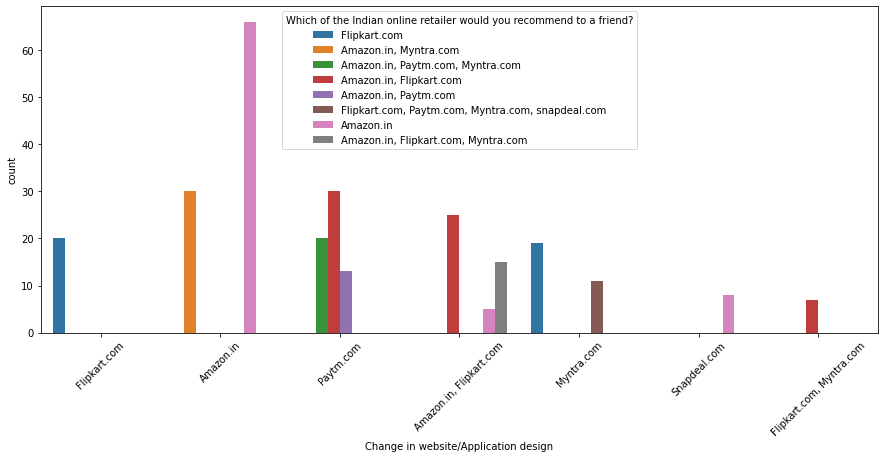

<Figure size 432x288 with 0 Axes>

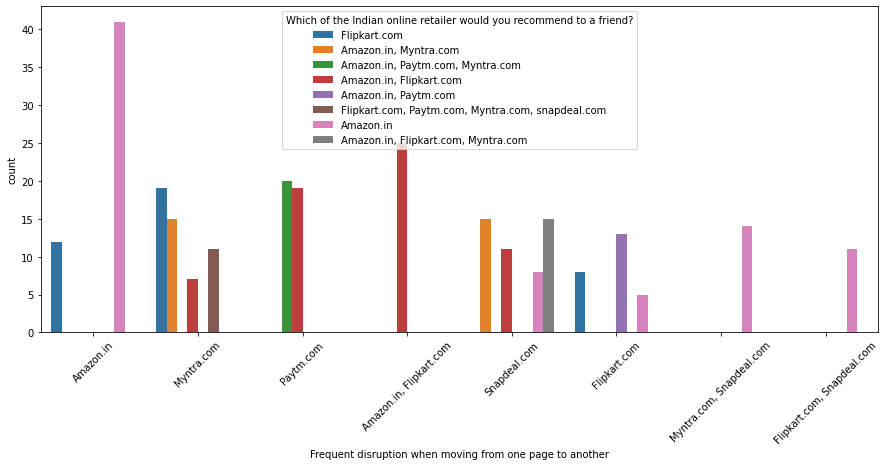

<Figure size 432x288 with 0 Axes>

In [29]:
for i in bad:
        plt.figure(figsize=(15,6))
        sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()


Customers seem to be more loyal to amazon, flipkart and paytm as even though many of them have given negative remarks about them still they would recommend these platforms to their friend

### Correlation

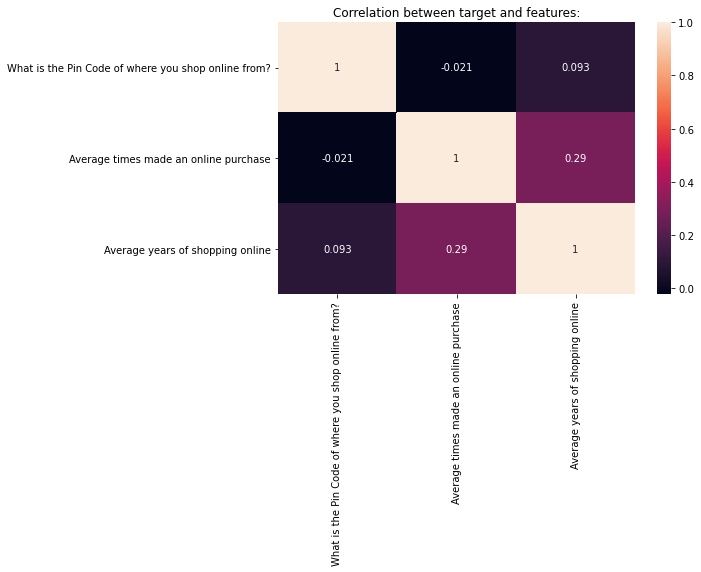

In [30]:
plt.figure(figsize = (8, 5))
plt.title("Correlation between target and features:")
sns.heatmap(df.corr(), annot = True)
plt.show()

### Processing the dataframe

#### Separating the label from rest of the features

In [31]:
x=df.copy()
x.drop('Which of the Indian online retailer would you recommend to a friend?',axis=1,inplace=True)
y=df['Which of the Indian online retailer would you recommend to a friend?']

#### Encoding Categorical Features

In [32]:
cat=[i for i in x.columns if x[i].dtypes=='O']

In [33]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
encode=OrdinalEncoder()
labe=LabelEncoder()

In [34]:
#using ordinal encoder for independent features
for i in cat:
    x[i]=encode.fit_transform(x[i].values.reshape(-1,1))

#Using label encoder for Label Column
y=labe.fit_transform(y)

### Scaling the dataset

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

#### Using various feature selection method to see which feature affects the most

In [36]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(x,y)


RandomForestClassifier()

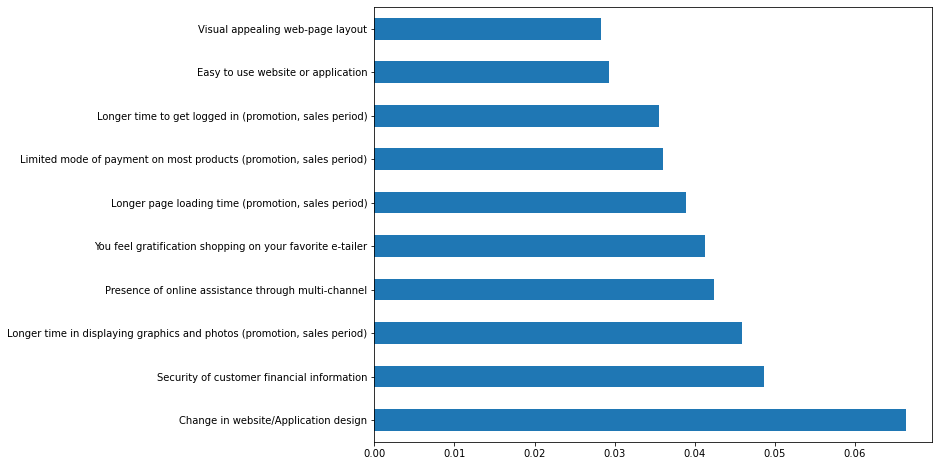

In [37]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(m.feature_importances_, index=x.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In the above chart we can see that above features are of most importance in determining whhich platform will a ciustomer recommend to his friend.

### Using chi2 test

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
selection = SelectKBest(score_func=chi2)
fit = selection.fit(x,y)

In [40]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns


In [41]:
print(featureScores.nlargest(10,'Score'))  #print10 best features
feat=list(featureScores.nlargest(10,'Score')['Features'])


                                             Features      Score
16    Why did you abandon the “Bag”, “Shopping Cart”?  75.754028
22                       Loading and processing speed  59.810983
42  Shopping on the website gives you the sense of...  59.253569
10  What browser do you run on your device to acce...  57.171099
67               Change in website/Application design  55.301526
49                   Visual appealing web-page layout  54.245760
65  Limited mode of payment on most products (prom...  53.269266
61  Longer time to get logged in (promotion, sales...  48.222655
62  Longer time in displaying graphics and photos ...  48.130643
50                   Wild variety of product on offer  47.605973


### Principal Component Analysis(PCA)

In [42]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

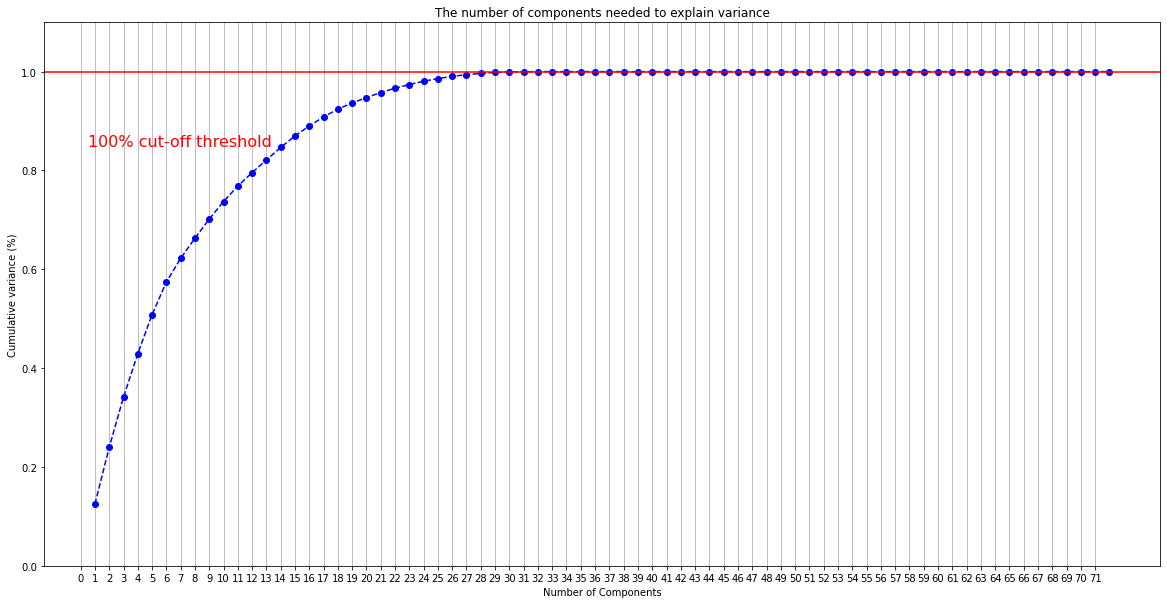

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, 73, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 72, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

we can clearly see that with 29 features all the information can be retained



In [44]:
pca=PCA(n_components=29)
x=pca.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,2.065419,-0.577759,-1.030081,-1.109784,0.652387,-1.137025,0.699876,-0.023177,-0.960103,-0.238855,...,0.598931,0.068875,-0.266070,-0.009322,-0.128444,-0.024680,-0.225888,-0.104111,-0.203283,-0.207393
1,0.048667,-1.490547,1.081348,0.641617,0.066388,-0.820495,0.072214,-0.644870,0.087754,-0.296247,...,-0.176390,-0.008384,0.155024,0.313679,0.079454,-0.162517,-0.101240,0.295586,-0.135537,0.122856
2,1.671684,-0.120022,0.775570,-1.481374,0.128287,0.836151,-0.793600,0.102789,0.448813,-0.515949,...,0.038239,-0.068419,0.008284,0.215976,-0.037138,0.094985,-0.174314,0.156931,-0.006150,-0.166877
3,-0.009522,2.146296,0.753236,-0.363176,-1.348954,-0.176575,0.567430,-0.548924,-0.142604,-0.084665,...,0.025910,0.229481,-0.091051,0.190278,-0.069483,-0.059019,-0.140161,0.103730,0.035920,-0.116666
4,0.051352,-0.187387,2.386865,0.914150,0.273219,-0.992250,-0.511792,0.701105,-0.225943,0.735107,...,-0.032298,0.130742,-0.195750,-0.163709,-0.071655,-0.186014,0.047217,0.185140,-0.035241,0.134780


### Modelling Phase

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 1, 100.0


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC




### Model Fitting

In [58]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)


# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 100.0
Accuracy Score of Decision Tree Classifier model is 100.0
Accuracy Score of K-Nearest Neighbour Classifier model is 100.0
Accuracy Score of Support Vector Classifier model is 100.0
Accuracy Score of Random Forest model is 100.0
Accuracy Score of ADA Boost model is 61.72839506172839


### Cross Validation:

In [59]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x, y, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x, y, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x, y, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x, y, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x, y, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x, y, cv = 10)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of accuracy scores is for Logistic Regression is 100.0

[0.96296296 0.92592593 1.         0.96296296 1.         1.
 1.         1.         1.         1.        ]
Mean of accuracy scores is for Decision Tree Classifier is 98.51851851851852

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of accuracy scores is for KNN Classifier is 100.0

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of accuracy scores is for SVC Classifier is 100.0

[1.         0.96296296 1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean of accuracy scores is for Random Forest Classifier is 99.62962962962962

[0.48148148 0.37037037 0.44444444 0.51851852 0.40740741 0.59259259
 0.44444444 0.48148148 0.37037037 0.5       ]
Mean of accuracy scores is for ADA Boost Classifier is 46.11111111111111



### Hyperparameter Tuning

In [72]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]}

g=RandomizedSearchCV(RandomForestClassifier(),params,cv=10,scoring='f1')
g.fit(x_train,y_train)
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=4)
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 9}
nan


In [73]:
rfc = RandomForestClassifier(criterion = 'entropy', min_samples_split = 2, n_estimators = 100)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

1.0


In [66]:
print('Accuracy',np.round(accuracy_score(p,y_test),4))


Accuracy 1.0


In [74]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

plot_roc_curve(rfc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Accuracy Score of RFC model is 100.0
Confusion matrix for RFC Model is
[[26  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  2]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         2

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



ValueError: RandomForestClassifier should be a binary classifier